Neste teste tecnico pude resolver apenas tres dos quesitos minimos que estao detalhados abaixo.

In [1]:
import pandas as pd
df_trip = pd.concat([pd.read_json('data-sample_data-nyctaxi-trips-2009-json_corrigido.json', lines=True),
                     pd.read_json('data-sample_data-nyctaxi-trips-2010-json_corrigido.json', lines=True),
                     pd.read_json('data-sample_data-nyctaxi-trips-2011-json_corrigido.json', lines=True),
                     pd.read_json('data-sample_data-nyctaxi-trips-2012-json_corrigido.json', lines=True)
                    ])

In [2]:
df_trip.head(2)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,tip_amount,tolls_amount,total_amount
0,CMT,2009-04-21T18:51:11.767205+00:00,2009-04-21T18:57:09.433767+00:00,2,0.8,-74.004114,40.742950,NaN,NaN,-73.994712,40.747950,Cash,5.4,0.0,0.0,0.0,5.4
1,CMT,2009-01-13T07:40:07.639754+00:00,2009-01-13T07:50:36.386011+00:00,1,5.4,-73.996506,40.747784,NaN,NaN,-73.940449,40.792385,Cash,15.4,0.0,0.0,0.0,15.4


### 1. Qual a distancia media percorrida por viagens com no maximo 2 passageiros?

In [3]:
df_trip.query('passenger_count < 3')['trip_distance'].mean()

2.6625269962030926

### 2. Quais os 3 maiores vendors em quantidade total de dinheiro arrecadado?

In [4]:
res = df_trip.groupby('vendor_id')['total_amount'].sum()
res.sort_values(ascending=False).head(3)

vendor_id
CMT    1.954908e+07
VTS    1.904343e+07
DDS    2.714902e+06
Name: total_amount, dtype: float64

### 3. Faca um histograma da distribuicao mensal, nos 4 anos, de corridas pagas em dinheiro.

In [11]:
# isolando variaveis relevantes
cols = ['payment_type','dropoff_datetime']
df_res = pd.DataFrame()
for col in cols:
    df_res[col]=df_trip[col]
df_res.head(5)

,payment_type,dropoff_datetime
0,Cash,2009-04-21T18:57:09.433767+00:00
1,Cash,2009-01-13T07:50:36.386011+00:00
2,CASH,2009-01-06T19:43:09.908429+00:00
3,CASH,2009-09-24T08:41:56.739991+00:00
4,CASH,2009-10-29T05:57:22.880174+00:00


In [12]:
# tamanho dataframe
df_res.count()

payment_type        4000000
dropoff_datetime    4000000
dtype: int64

In [17]:
# filtrando o dataframe para pgtos em cash apenas
df_res=df_res[df_res.payment_type.str.lower() == 'cash']

In [18]:
# novo tamanho dataframe apos filtro
df_res.count()

payment_type        3242852
dropoff_datetime    3242852
dtype: int64

In [23]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3242852 entries, 0 to 999999
Data columns (total 2 columns):
payment_type        object
dropoff_datetime    object
dtypes: object(2)
memory usage: 74.2+ MB


In [26]:
#convertendo a variavel object para datetime
df_res['dropoff_datetime']=pd.to_datetime(df_res['dropoff_datetime'].str.strip())

In [27]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3242852 entries, 0 to 999999
Data columns (total 2 columns):
payment_type        object
dropoff_datetime    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 74.2+ MB


In [28]:
df_res.head()

,payment_type,dropoff_datetime
0,Cash,2009-04-21 18:57:09.433767+00:00
1,Cash,2009-01-13 07:50:36.386011+00:00
2,CASH,2009-01-06 19:43:09.908429+00:00
3,CASH,2009-09-24 08:41:56.739991+00:00
4,CASH,2009-10-29 05:57:22.880174+00:00


In [31]:
# extraindo variaveis year e month a partir da variavel dropoff_datetime
df_res['year'] =pd.DatetimeIndex(df_res['dropoff_datetime']).year
df_res['month']=pd.DatetimeIndex(df_res['dropoff_datetime']).month

In [33]:
df_res.head()

,payment_type,dropoff_datetime,year,month
0,Cash,2009-04-21 18:57:09.433767+00:00,2009,4
1,Cash,2009-01-13 07:50:36.386011+00:00,2009,1
2,CASH,2009-01-06 19:43:09.908429+00:00,2009,1
3,CASH,2009-09-24 08:41:56.739991+00:00,2009,9
4,CASH,2009-10-29 05:57:22.880174+00:00,2009,10


In [47]:
# df_plot contem a distribuicao de pgtos mas ainda nao agrupados
df_plot = pd.DataFrame()
cols_plot = ['year','month']
for col in cols_plot:
    df_plot[col]=df_res[col]
df_plot.head(20)

,year,month
0,2009,4
1,2009,1
2,2009,1
3,2009,9
4,2009,10
5,2009,10
6,2009,3
8,2009,3
9,2009,2
10,2009,6


In [35]:
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3242852 entries, 0 to 999999
Data columns (total 2 columns):
year     int64
month    int64
dtypes: int64(2)
memory usage: 74.2 MB


In [51]:
# agrupando o numero de ocorrencias de pgtos em cash a cada mes por ano
df_group = df_plot.groupby(['year','month']).size().to_frame('count').reset_index()
df_group.head(15)

,year,month,count
0,2009,1,66812
1,2009,2,66680
2,2009,3,73943
3,2009,4,71142
4,2009,5,74152
5,2009,6,71346
6,2009,7,74072
7,2009,8,74022
8,2009,9,71508
9,2009,10,74014


In [50]:
df_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
year     45 non-null int64
month    45 non-null int64
count    45 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


In [93]:
# quero transformar as colunas year e month em apenas uma coluna para fins de plot
df_group['period']=df_group['year'].astype(str)+"-"+df_group['month'].astype(str)
df_group.head(15)

,year,month,count,period
0,2009,1,66812,2009-1
1,2009,2,66680,2009-2
2,2009,3,73943,2009-3
3,2009,4,71142,2009-4
4,2009,5,74152,2009-5
5,2009,6,71346,2009-6
6,2009,7,74072,2009-7
7,2009,8,74022,2009-8
8,2009,9,71508,2009-9
9,2009,10,74014,2009-10


In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(20,10))

<BarContainer object of 45 artists>

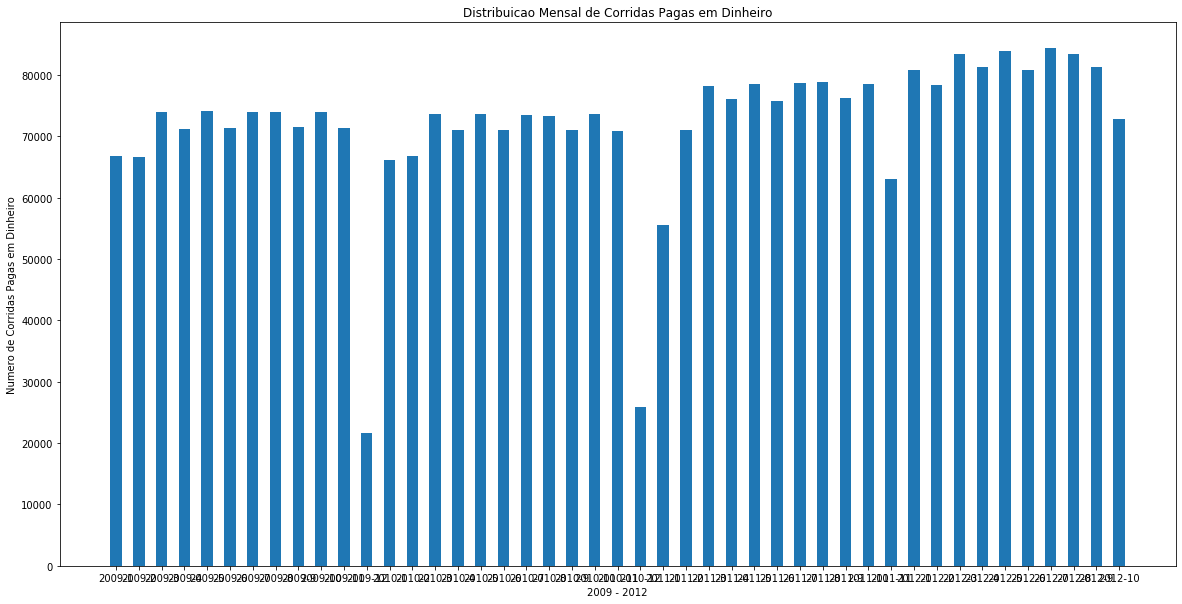

In [97]:
plt.title('Distribuicao Mensal de Corridas Pagas em Dinheiro')
plt.xlabel('2009 - 2012')
plt.ylabel('Numero de Corridas Pagas em Dinheiro')
plt.bar(df_group['period'],df_group['count'], width=0.5)